<a href="https://colab.research.google.com/github/palepss/analise-exploratoria-googlecolab-pandas/blob/main/analise_de_dados_com_python_e_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise exploratória sobre a base de dados de vendas da AdventureWorks  disponibilizado pela empresa Microsoft**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
# leitura de arquivos
df = pd.read_excel("/content/drive/My Drive/MachineLearning/AdventureWorks.xlsx")

In [ ]:
# visualizando 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
# quantidade de linhas e colunas
df.shape

(904, 16)

In [ ]:
# verificando os tipos de dados do dataset
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
# qual o valor da receita total?
df["Valor Venda"].sum()

5984606.1426

In [ ]:
# qual o valor do custo total?
# criando coluna de custo
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [ ]:
# qual o custo total?
round(df["custo"].sum(),2)

2486783.05

In [ ]:
# agora que temos a receita de custo e o total, podemos achar o lucro total
# vamos criar uma coluna de licro que será Receita-Custo
df["lucro"] = df["Valor Venda"] - df["custo"]

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [ ]:
# total lucro
round(df["lucro"].sum(),2)

3497823.09

In [ ]:
# criando uma coluna com total de dias para enviar o produto
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


**Agora, queremos saber a média do tempo de envio para cada marca.
Para isso, precisamos transformar a coluna Tempo_envio em uma coluna numérica.**

In [ ]:
# extraindo apenas os dias
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [ ]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [ ]:
# verificando o tipo de coluna tempo_envio
df["Tempo_envio"].dtype

dtype('int64')

In [ ]:
# média de tempo de envio por marca
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

**Missing values**

In [ ]:
# verificando se temos valores faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

**Valor do lucro por ano e por marca**

In [ ]:
# vamos agrupar por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [ ]:
#configurando formatos de numeros flutuantes
#(para corrigir linha de codigo acima)
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
# resetando o index e criando nova tabela com index, ano, marca e lucros
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [ ]:
# qual o valor total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

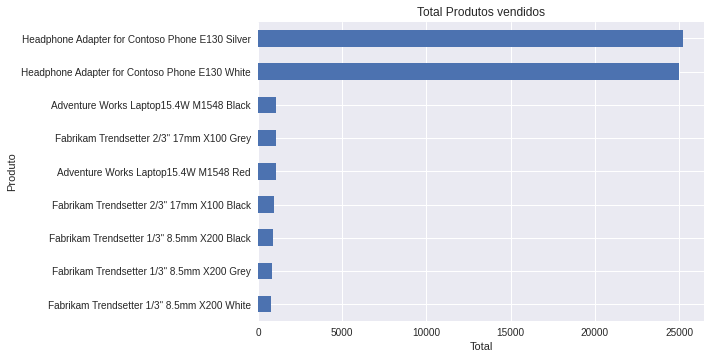

In [ ]:
# gráfico com o valor total de produtos vendido
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")

Text(0, 0.5, 'Receita')

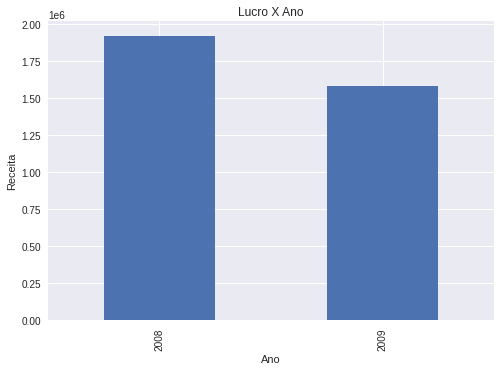

In [ ]:
# gráfico com o valor total do lucro por ano
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro X Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")

In [ ]:
# valor total de luvro por ano
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [ ]:
# selecionando apenas s vendas de 2019
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


Text(0, 0.5, 'Lucro')

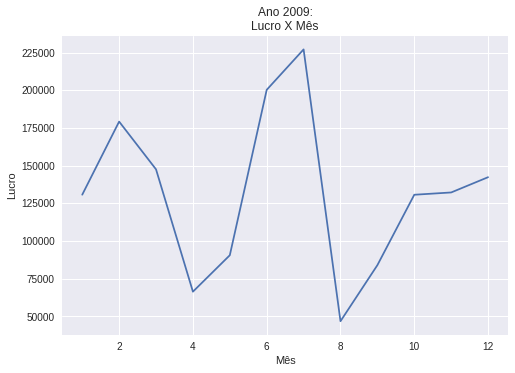

In [ ]:
# gráfico de linhas lucro x mês
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Ano 2009:\nLucro X Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro")

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

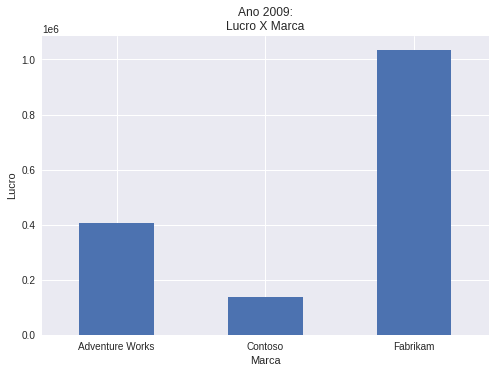

In [ ]:
# gráfico de barras de lucro por marcas no ano 2009
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Ano 2009:\nLucro X Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

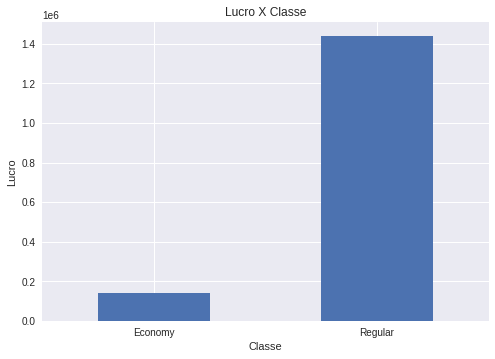

In [ ]:
# gráfico de barras de lucro por classe
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro X Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

**Análise Estatística**

In [ ]:
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

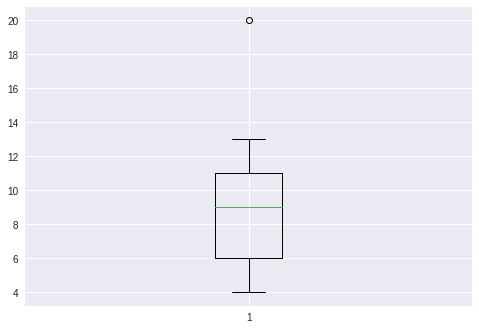

In [ ]:
# gráfico de boxplot (usado para a leitura dos dados estatísticos acima)
# a linha 4 representa o limite inferior, a linha 6 representa o primeiro quartil;
# a linha verde representa a mediana, na linha 11 representa o terceiro quartil;
# e a 13 representa o limite superior;
# a bolinha representa um outlier(valor discrepante, pode ser causado por valores externos *greve correios por exemplo)
plt.boxplot(df["Tempo_envio"]);

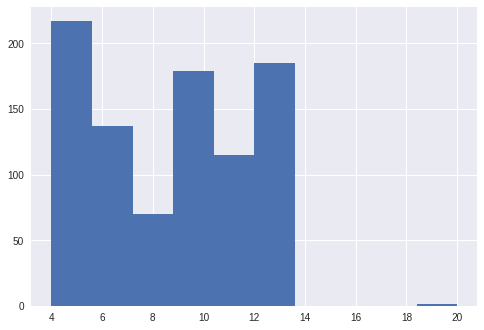

In [ ]:
# histograma
plt.hist(df["Tempo_envio"]);

In [ ]:
# tempo mínimo de envio
df["Tempo_envio"].min()

In [ ]:
# tempo máximo de envio
df["Tempo_envio"].max()

In [ ]:
# identificando outliers
df[df["Tempo_envio"]==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [ ]:
df.to_csv("df_vendas_novo.csv", index=False)